In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# pandas = para trabajar con df.
# numpy = para op. matemáticas.
# matplotlib.pyplot es para los gráficos.

In [2]:
#PREGUNTA 1:
#Bienvenidos al primer ejercicio de Python del semestre
#Para comenzar es necesario que importen el archivo Excel llamado "PBI Real"
#Este Archivo se encuentra en PAIDEIA

In [3]:
#Una vez  realizada la importación, creamos una base de datos con este archivo
#El código para esto es
df=pd.read_excel('PBI Real.xlsx')
#Luego es necesario que la columna fecha sea el índice de nuestra base de datos
df=df.set_index('Fecha')

In [ ]:
#Verificamos las 10 primeras columnas de nuestra base de datos mediante este código

df.head(10)

,PBI Real
Fecha,
1922,13308.287921
1923,14084.165195
1924,15427.896049
1925,15803.574185
1926,17335.854294
1927,17726.959481
1928,18743.003273
1929,20726.920304
1930,18612.209986


In [ ]:
#Ahora realizamos el cálculo de la tasa de crecimiento primero mediante una variación porcentual
#La formula es (X2 - X1)/X1*100

In [ ]:
#Para ello creamos una base vacía donde guardaremos las tasas de crecimiento
tasas=pd.DataFrame()
tasas.index=df.index
#Ahora realizamos el cálculo y lo guardamos en una columna dentro de esta base vacía llamada "Tasas de crecimiento"
tasas['Tasas de crecimiento']=(df['PBI Real']-df['PBI Real'].shift(1))/df['PBI Real'].shift(1)*100

In [ ]:
#Veamos nuestro resultado
tasas.head(10)

,Tasas de crecimiento
Fecha,
1922,NaN
1923,5.830031
1924,9.540721
1925,2.435057
1926,9.695782
1927,2.256048
1928,5.731630
1929,10.584841
1930,-10.202723


In [ ]:
#Ahora calculamos la tasa mediante la expansión de taylor (lo cual es equivalente a hallar la variación en logs)
#Transformamos la serie en logs
df['log_PBI']=np.log(df['PBI Real'])
#Vemos como quedo nuestra base de datos
df.head(10)

,PBI Real,log_PBI
Fecha,,
1922,13308.287921,9.496142
1923,14084.165195,9.552806
1924,15427.896049,9.643933
1925,15803.574185,9.667991
1926,17335.854294,9.760532
1927,17726.959481,9.782842
1928,18743.003273,9.838576
1929,20726.920304,9.939189
1930,18612.209986,9.831573


In [ ]:
#Calculamos la segunda tasa de crecimiento
tasas['Tasa de crecimiento en logs']= (df['log_PBI'] - df['log_PBI'].shift(1))*100
#Vemos el resultado
tasas.head(10)

,Tasas de crecimiento,Tasa de crecimiento en logs
Fecha,,
1922,NaN,NaN
1923,5.830031,5.666414
1924,9.540721,9.112617
1925,2.435057,2.405883
1926,9.695782,9.254073
1927,2.256048,2.230976
1928,5.731630,5.573391
1929,10.584841,10.061283
1930,-10.202723,-10.761554


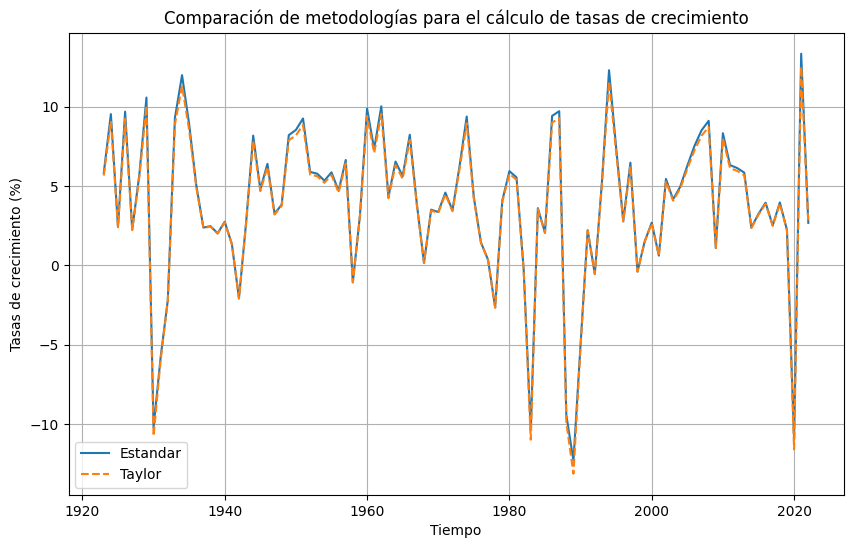

In [ ]:
#Comparamos mediante gráfico
plt.figure(figsize=(10, 6))
plt.plot(df.index, tasas['Tasas de crecimiento'],linestyle='-', label='Estandar')
plt.plot(df.index, tasas['Tasa de crecimiento en logs'],linestyle='--', label='Taylor')
plt.xlabel('Tiempo')
plt.ylabel('Tasas de crecimiento (%)')
plt.title('Comparación de metodologías para el cálculo de tasas de crecimiento')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#PREGUNTA 3:
#Importamos las series de Consumo e Inversión privada desde el 2010 hasta el 2022
series=pd.read_excel('Consumo e Inversión.xlsx')
series=series.set_index('Fecha')
series.head(10)

,Consumo Privado,Inversión Privada
Fecha,,
2010,235492.026527,76166.725948
2011,252506.829315,84517.953508
2012,271304.659921,97724.429449
2013,286857.161815,104661.483091
2014,298044.678578,102542.411551
2015,309917.408400,98101.031366
2016,321383.351218,93159.089085
2017,329870.427064,93199.277988
2018,342501.114325,97026.385354


In [ ]:
#Calculamos las tasas de crecimiento
#Para el consumo:
series['Crec. Consumo']= (np.log(series['Consumo Privado']) - np.log(series['Consumo Privado']).shift(1))*100
#Para la inversión:
series['Crec. Inversión']= (np.log(series['Inversión Privada']) - np.log(series['Inversión Privada']).shift(1))*100
#Vemos el resultado:
series.head(10)

,Consumo Privado,Inversión Privada,Crec. Consumo,Crec. Inversión
Fecha,,,,
2010,235492.026527,76166.725948,NaN,NaN
2011,252506.829315,84517.953508,6.976124,10.403928
2012,271304.659921,97724.429449,7.180410,14.518759
2013,286857.161815,104661.483091,5.574200,6.857960
2014,298044.678578,102542.411551,3.825901,-2.045469
2015,309917.408400,98101.031366,3.906243,-4.427860
2016,321383.351218,93159.089085,3.632881,-5.168921
2017,329870.427064,93199.277988,2.606528,0.043131
2018,342501.114325,97026.385354,3.757498,4.024298


In [ ]:
#Calculamos el promedio para ambos mediante el comando np.mean
print('La tasa de crecimiento del consumo es:', np.mean(series['Crec. Consumo']))
print('La tasa de crecimiento de la inversión es:', np.mean(series['Crec. Inversión']))

La tasa de crecimiento del consumo es: 3.7949592537050028
La tasa de crecimiento de la inversión es: 3.4648223114232066


In [ ]:
#PREGUNTA 3:
#La descarga de la data se da mediante la página web: https://data-central.conference-board.org/
#Es necesario crearse una cuenta pero no se preocupen que ya descargue la data del PBI Real para Argentina, Brasil, Chile, Perú y Venezuela
#El nombre del archivo es Paises

In [ ]:
#Importamos la base de datos
paises=pd.read_excel('Países.xlsx')
paises=paises.set_index('Date')
paises.head(10)

,Argentina,Brazil,Chile,Peru,Venezuela
Date,,,,,
1990,536251.36,1851134.75,150363.02,139846.64,362947.83
1991,592547.03,1870201.43,162097.35,142949.83,398262.66
1992,653573.44,1860102.35,180198.76,142176.48,422397.37
1993,694428.32,1951619.38,192072.06,149632.21,423558.97
1994,734913.49,2065789.12,201733.28,168048.94,413609.57
1995,714005.20,2152965.42,219754.11,180503.05,429955.42
1996,753468.27,2200521.50,230708.86,185555.33,429104.10
1997,814582.08,2275225.81,247762.86,197571.89,456442.33
1998,845943.49,2282918.30,258121.82,196797.41,457784.27


In [ ]:
#Calculamos las tasas de crecimiento, para ello primero transformamos las series en logs
paises['log_Argentina']=np.log(paises['Argentina'])
paises['log_Brazil']=np.log(paises['Brazil'])
paises['log_Chile']=np.log(paises['Chile'])
paises['log_Peru']=np.log(paises['Peru'])
paises['log_Venezuela']=np.log(paises['Venezuela'])
paises.head(10)

,Argentina,Brazil,Chile,Peru,Venezuela,log_Argentina,log_Brazil,log_Chile,log_Peru,log_Venezuela
Date,,,,,,,,,,
1990,536251.36,1851134.75,150363.02,139846.64,362947.83,13.192358,14.431309,11.920808,11.848302,12.802014
1991,592547.03,1870201.43,162097.35,142949.83,398262.66,13.292186,14.441557,11.995952,11.870249,12.894867
1992,653573.44,1860102.35,180198.76,142176.48,422397.37,13.390210,14.436142,12.101816,11.864824,12.953702
1993,694428.32,1951619.38,192072.06,149632.21,423558.97,13.450844,14.484170,12.165626,11.915936,12.956448
1994,734913.49,2065789.12,201733.28,168048.94,413609.57,13.507508,14.541023,12.214702,12.032011,12.932678
1995,714005.20,2152965.42,219754.11,180503.05,429955.42,13.478646,14.582357,12.300265,12.103503,12.971437
1996,753468.27,2200521.50,230708.86,185555.33,429104.10,13.532442,14.604205,12.348912,12.131108,12.969455
1997,814582.08,2275225.81,247762.86,197571.89,456442.33,13.610430,14.637590,12.420227,12.193858,13.031218
1998,845943.49,2282918.30,258121.82,196797.41,457784.27,13.648208,14.640965,12.461187,12.189930,13.034153


In [ ]:
#Ahora sí calculamos las tasas de crecimiento
#Creamos un dataframe vacío para guardar las tasas
crec_paises=pd.DataFrame()
crec_paises.index=paises.index
#Procedemos al cálculo de estas para cada país
crec_paises['Argentina']=(paises['log_Argentina']-paises['log_Argentina'].shift(1))*100
crec_paises['Brasil']=(paises['log_Brazil']-paises['log_Brazil'].shift(1))*100
crec_paises['Chile']=(paises['log_Chile']-paises['log_Chile'].shift(1))*100
crec_paises['Peru']=(paises['log_Peru']-paises['log_Peru'].shift(1))*100
crec_paises['Venezuela']=(paises['log_Venezuela']-paises['log_Venezuela'].shift(1))*100
#Vemos el resultado
crec_paises.head(10)

,Argentina,Brasil,Chile,Peru,Venezuela
Date,,,,,
1990,NaN,NaN,NaN,NaN,NaN
1991,9.982724,1.024731,7.514458,2.194734,9.285263
1992,9.802466,-0.541463,10.586338,-0.542463,5.883477
1993,6.063404,4.802797,6.381015,5.111125,0.274624
1994,5.666385,5.685281,4.907581,11.607490,-2.377029
1995,-2.886255,4.133386,8.556281,7.149243,3.875907
1996,5.379666,2.184822,4.864733,2.760544,-0.198198
1997,7.798829,3.338493,7.131551,6.274941,6.176281
1998,3.777736,0.337528,4.095956,-0.392769,0.293569


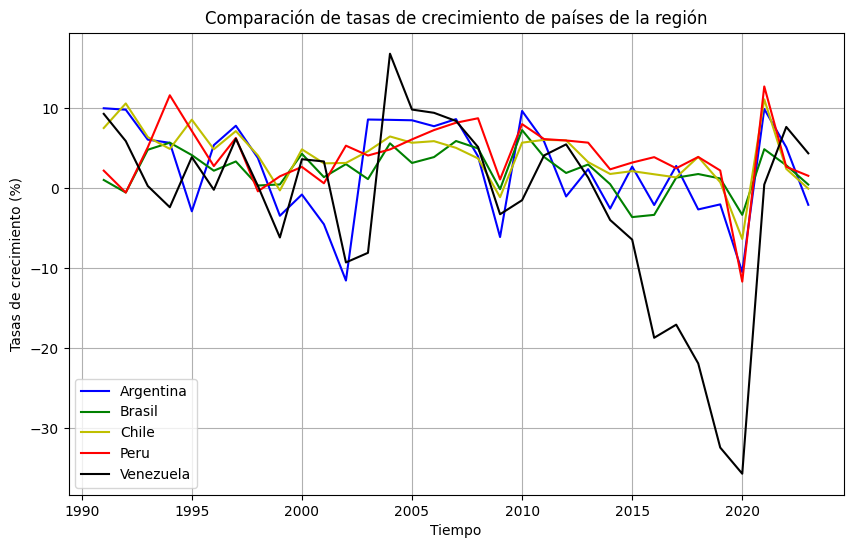

In [ ]:
#Ahora graficamos
plt.figure(figsize=(10, 6))
plt.plot(crec_paises.index, crec_paises['Argentina'],color='b', label='Argentina')
plt.plot(crec_paises.index, crec_paises['Brasil'],color='g', label='Brasil')
plt.plot(crec_paises.index, crec_paises['Chile'],color='y', label='Chile')
plt.plot(crec_paises.index, crec_paises['Peru'],color='r', label='Peru')
plt.plot(crec_paises.index, crec_paises['Venezuela'],color='k', label='Venezuela')
plt.xlabel('Tiempo')
plt.ylabel('Tasas de crecimiento (%)')
plt.title('Comparación de tasas de crecimiento de países de la región')
plt.legend()
plt.grid(True)
plt.show()

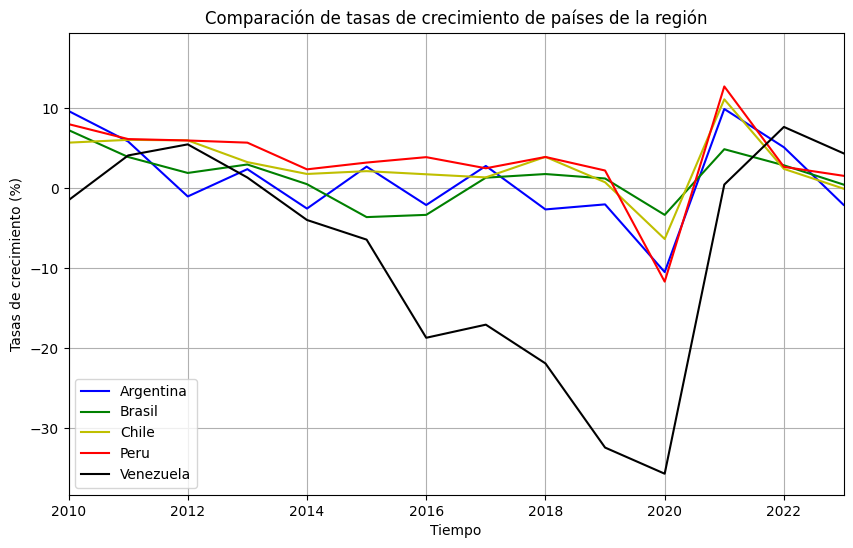

In [ ]:
#Vemos las tasas desde 2010

plt.figure(figsize=(10, 6))
plt.plot(crec_paises.index, crec_paises['Argentina'], color='b', label='Argentina')
plt.plot(crec_paises.index, crec_paises['Brasil'], color='g', label='Brasil')
plt.plot(crec_paises.index, crec_paises['Chile'], color='y', label='Chile')
plt.plot(crec_paises.index, crec_paises['Peru'], color='r', label='Peru')
plt.plot(crec_paises.index, crec_paises['Venezuela'], color='k', label='Venezuela')


plt.xlim(2010, crec_paises.index.max())

plt.xlabel('Tiempo')
plt.ylabel('Tasas de crecimiento (%)')
plt.title('Comparación de tasas de crecimiento de países de la región')
plt.legend()
plt.grid(True)
plt.show()
